In [1]:
'''The data contains approximately 32,000 observations with over 15 variables.
The strategy is to analyze the data and perform a predictive task of classification to
predict whether an individual makes over 50K a year or less by using a logistic
regression algorithm.'''

'The data contains approximately 32,000 observations with over 15 variables.\nThe strategy is to analyze the data and perform a predictive task of classification to\npredict whether an individual makes over 50K a year or less by using a logistic\nregression algorithm.'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from pprint import PrettyPrinter


In [3]:
#Load the data
data=pd.read_csv(r"C:\Users\penfr\OneDrive\Desktop\Intellipaat_Python\Logistic Regression assignment\census-income .csv")
data.head()
data.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [4]:
#inspecting data
data.shape

(32561, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  annual_income   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
obj_list = data.select_dtypes(include='object').columns.tolist()
print("The object type columns are:")

The object type columns are:


In [7]:
pp = PrettyPrinter()
output = ', '.join([ pp.pformat(p) for p in obj_list])
output

"'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'annual_income'"

In [8]:
#Check for nulls
data.isnull().sum().sum()

0

In [9]:
# Check unique values in each column
for col in data.columns:
    unique_vals = data[col].unique()
    print(f"Column '{col}' unique values: {unique_vals}")

Column 'age' unique values: [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
Column 'workclass' unique values: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
Column 'fnlwgt' unique values: [ 77516  83311 215646 ...  34066  84661 257302]
Column 'education' unique values: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
Column 'education-num' unique values: [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
Column 'marital-status' unique values: ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
Column 'occupation' unique values: ['Adm-clerical' 'Exec-managerial'

In [10]:
data.replace('?', np.nan, inplace=True)

# Count the total number of missing values in the dataset
total_missing = data.isnull().sum().sum()

print(f'Total missing values in the dataset after replacing "?" with NaN: {total_missing}')

Total missing values in the dataset after replacing "?" with NaN: 4262


In [11]:
len(data['occupation'].unique())

15

In [12]:
#len(data[(data['occupation']=='Tech-support') & (data['annual_income']=='>50K')])
count_tech_support_above_50k = data.loc[(data['occupation'] == 'Tech-support') & (data['annual_income'] == '>50K')].shape[0]
print(count_tech_support_above_50k)

283


In [13]:
data.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
annual_income        0
dtype: int64

In [14]:
df_salorwork=data.loc[(data['hours-per-week']>=40)|(data['annual_income'] == '<=50K')].shape[0]
print(df_salorwork)


31823


In [15]:
#replacing nans
for col in data.columns:
    if data[col].isnull().any():
        if data[col].dtype == 'object':
            mode_val = data[col].mode()[0]  # Calculate mode for object columns
            data[col].fillna(mode_val, inplace=True)
        else:
            mean_val = data[col].mean()  # Calculate mean for numeric columns
            data[col].fillna(mean_val, inplace=True)

In [16]:
#Checking again for Nans
data.isnull().sum().sum()

0

In [17]:
#Analyse the target variable
print(data['annual_income'].value_counts())

<=50K    24720
>50K      7841
Name: annual_income, dtype: int64


<AxesSubplot:xlabel='annual_income', ylabel='count'>

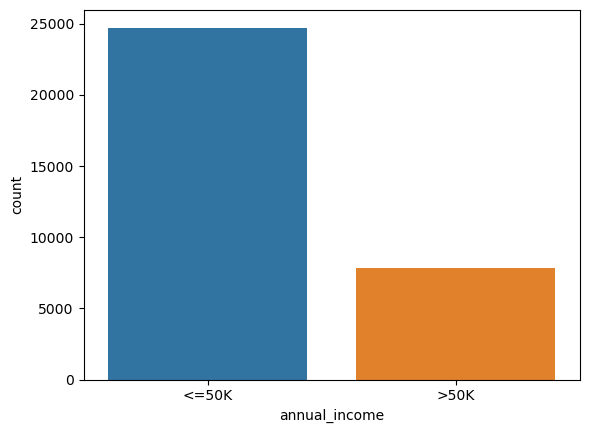

In [18]:
#Plotting the target variable column
sns.countplot(x='annual_income',data=data)

In [19]:
#Explore the numerical features
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'education-num'}>,
        <AxesSubplot:title={'center':'capital-gain'}>],
       [<AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'hours-per-week'}>]], dtype=object)

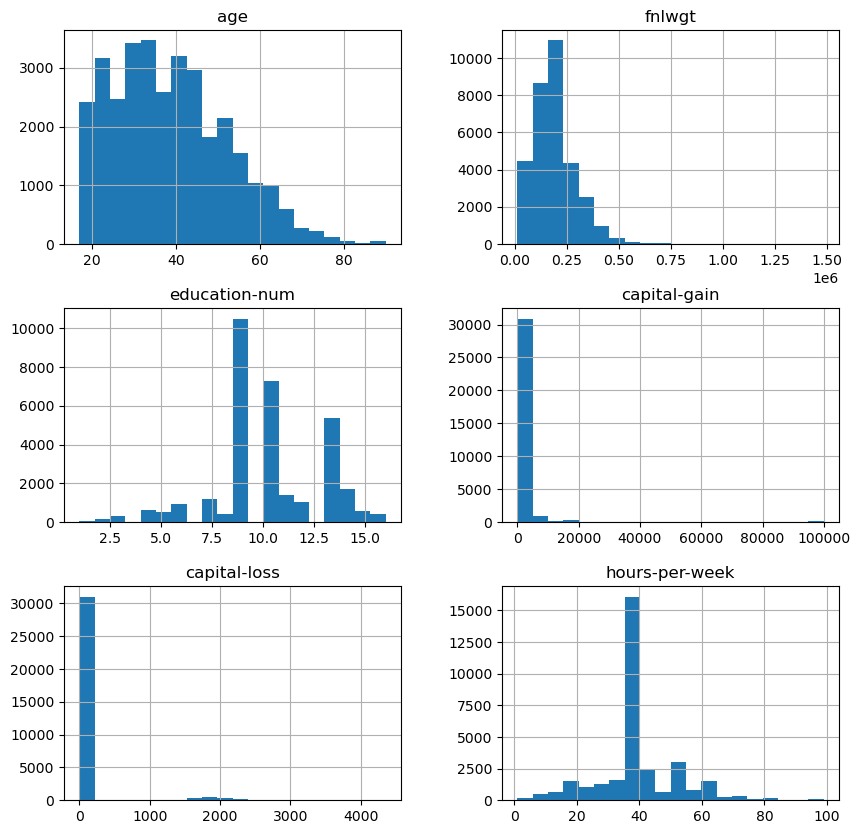

In [20]:
data.hist(figsize=(10,10),bins=20)

Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64


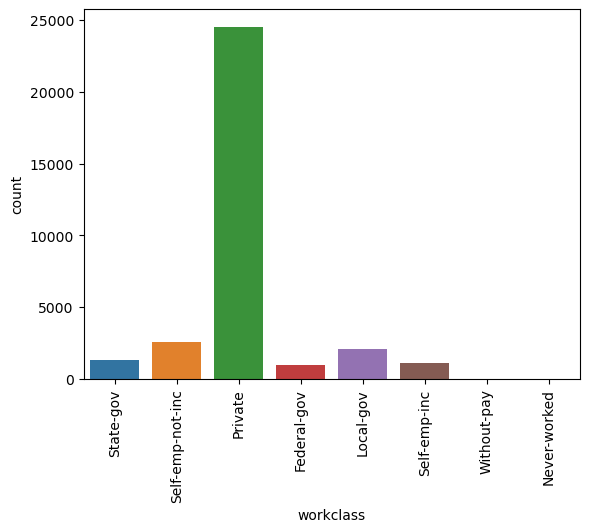

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64


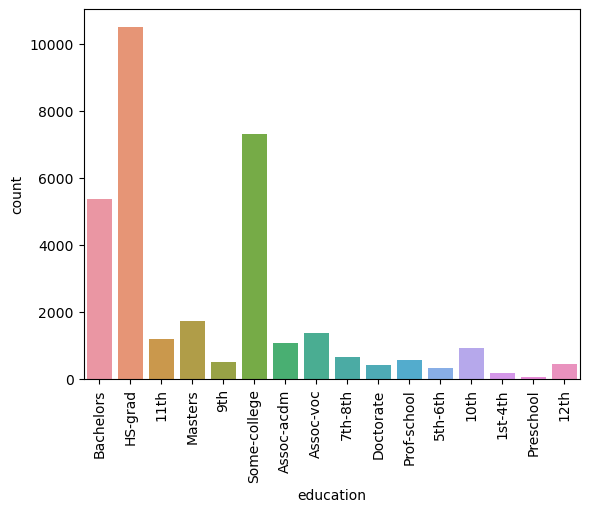

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64


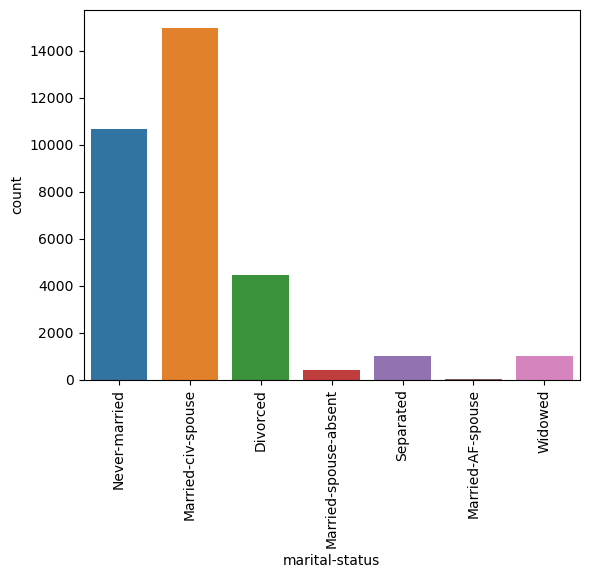

Prof-specialty       5983
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64


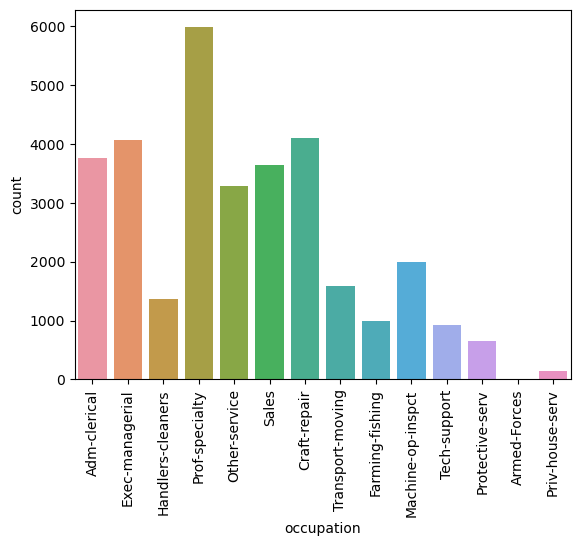

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64


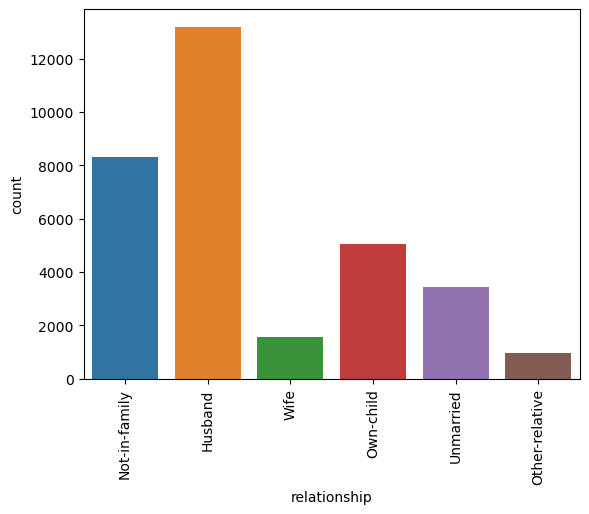

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64


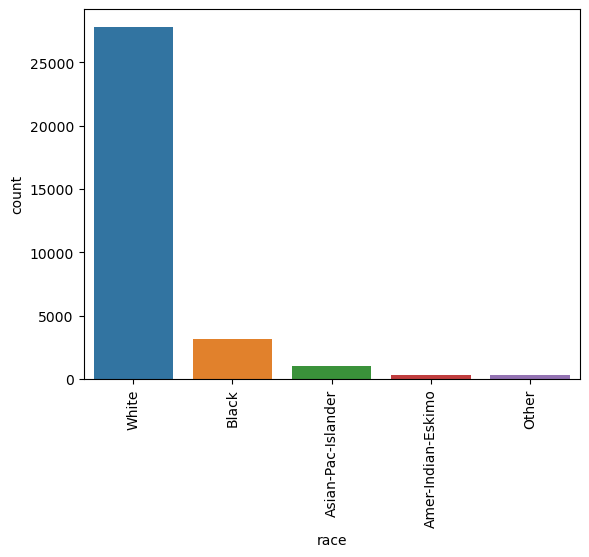

Male      21790
Female    10771
Name: sex, dtype: int64


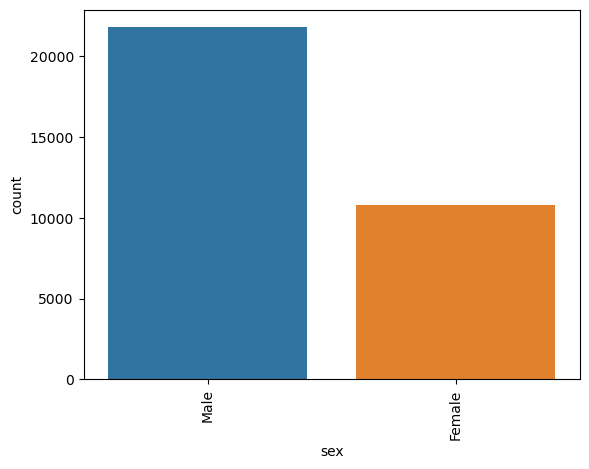

United-States                 29753
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

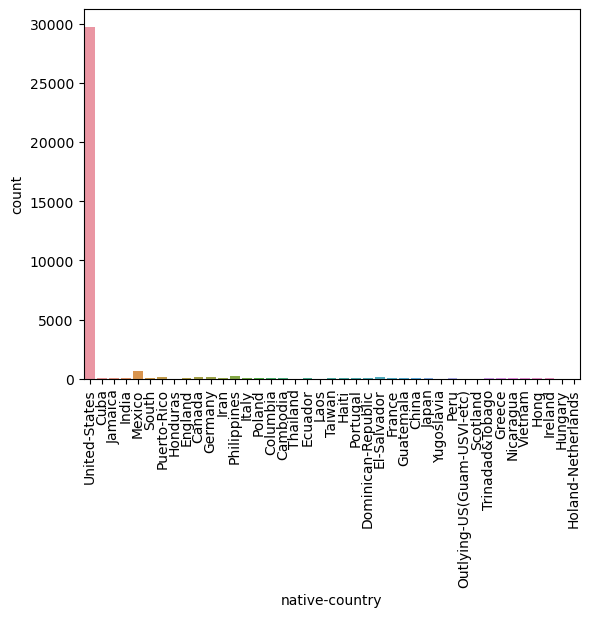

<=50K    24720
>50K      7841
Name: annual_income, dtype: int64


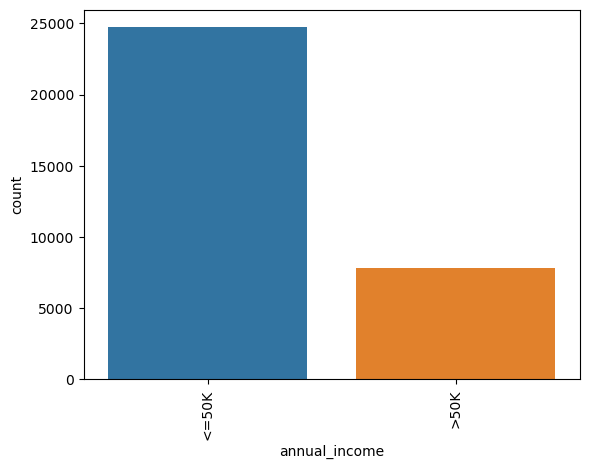

In [21]:
#Analyse categorical features
for col in data.select_dtypes(include='object').columns:
    print(data[col].value_counts())
    sns.countplot(x=col,data=data)
    plt.xticks(rotation=90, ha='center')
    plt.show()

In [22]:
df_private_count=data.loc[(data['workclass']=='Private') & (data['native-country']!='United-States')].shape[0]
df_private_count

2301

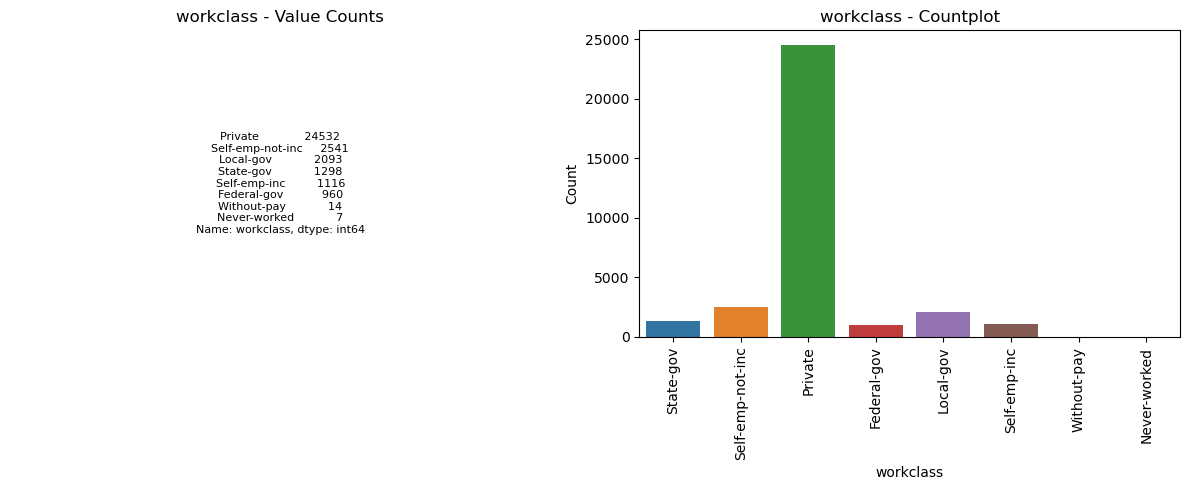

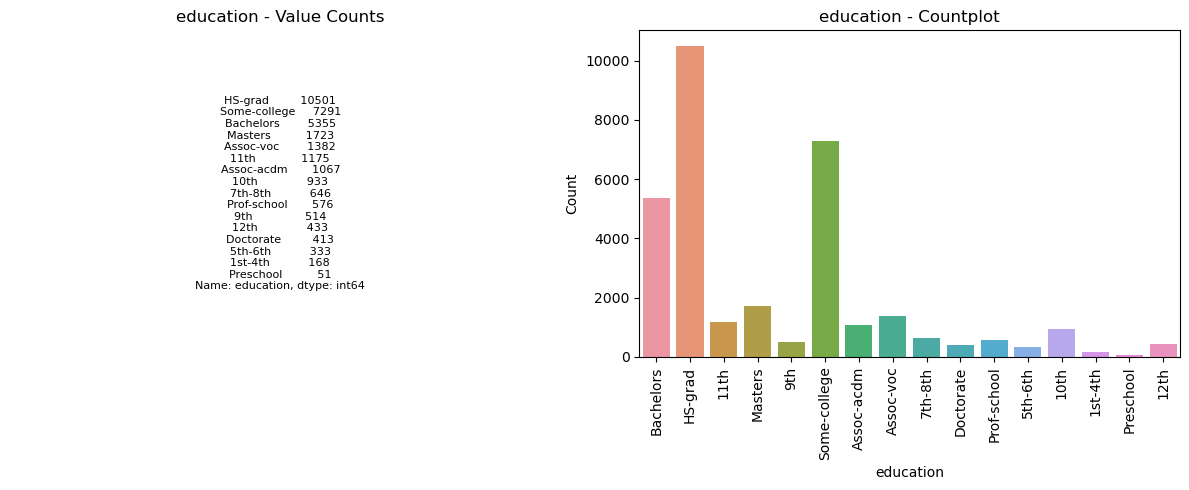

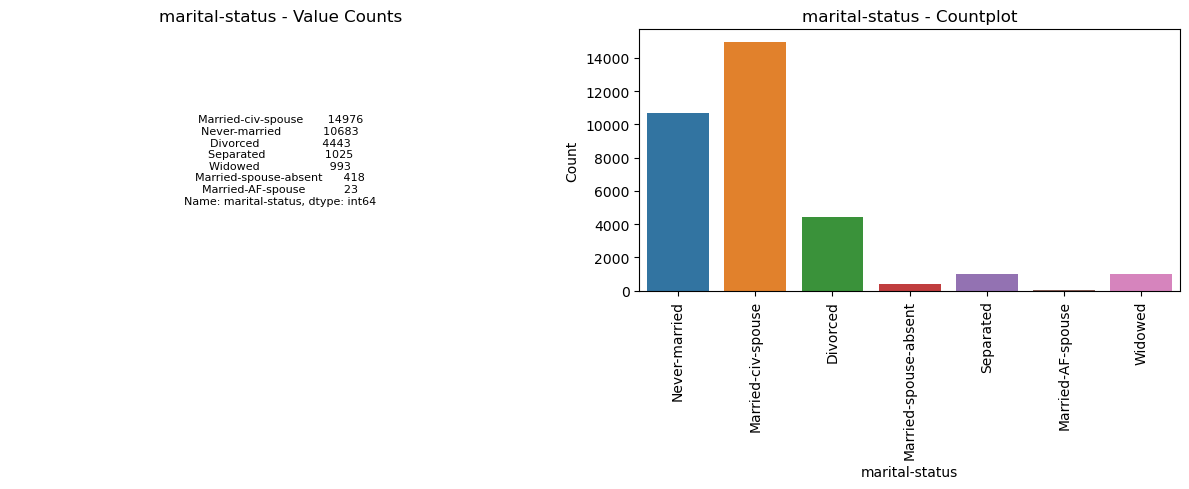

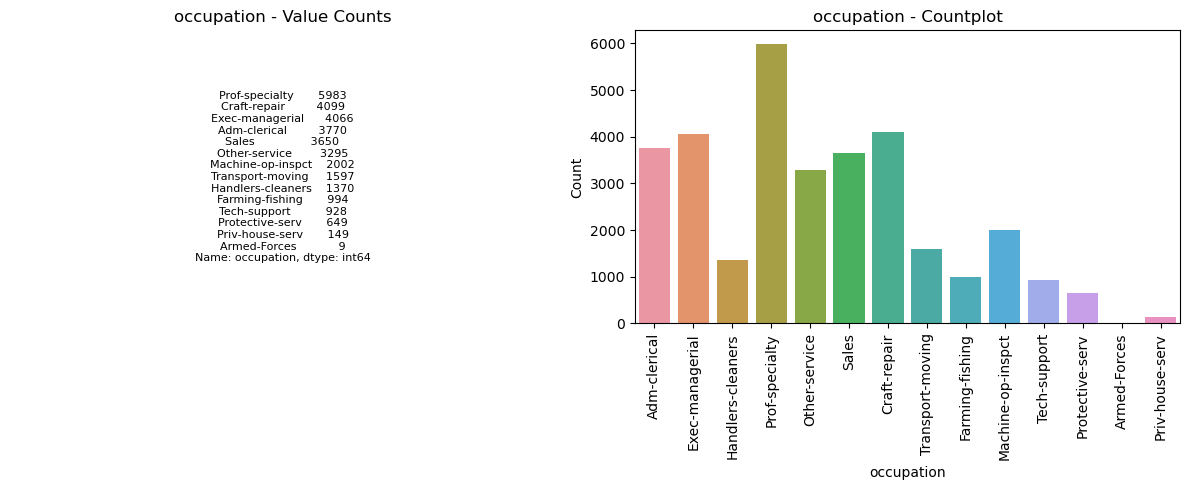

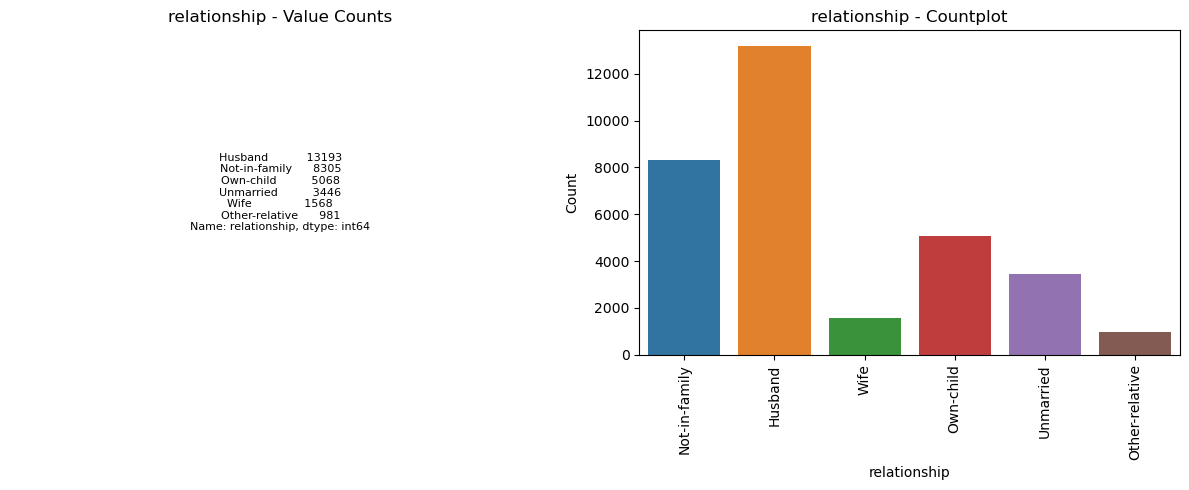

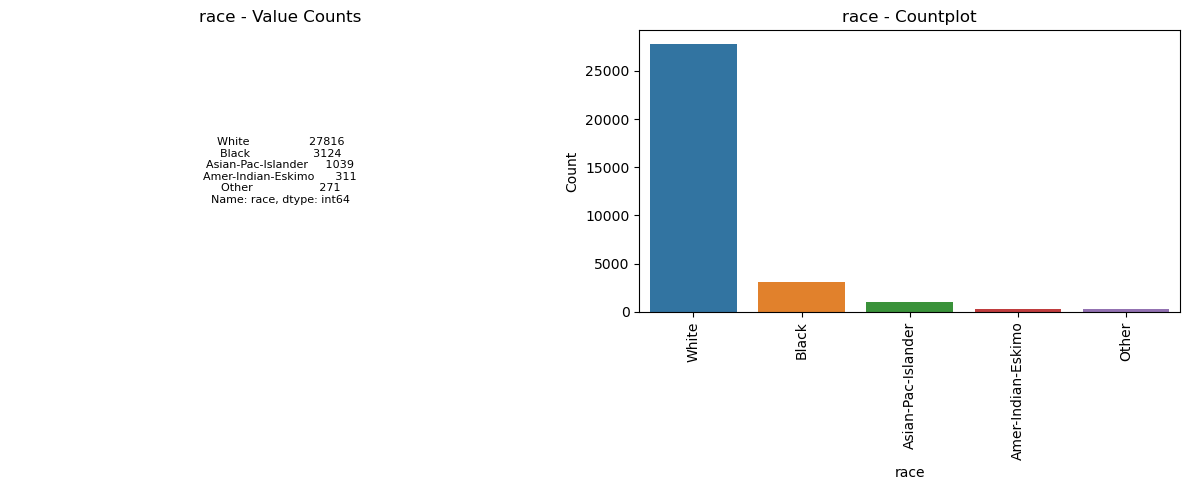

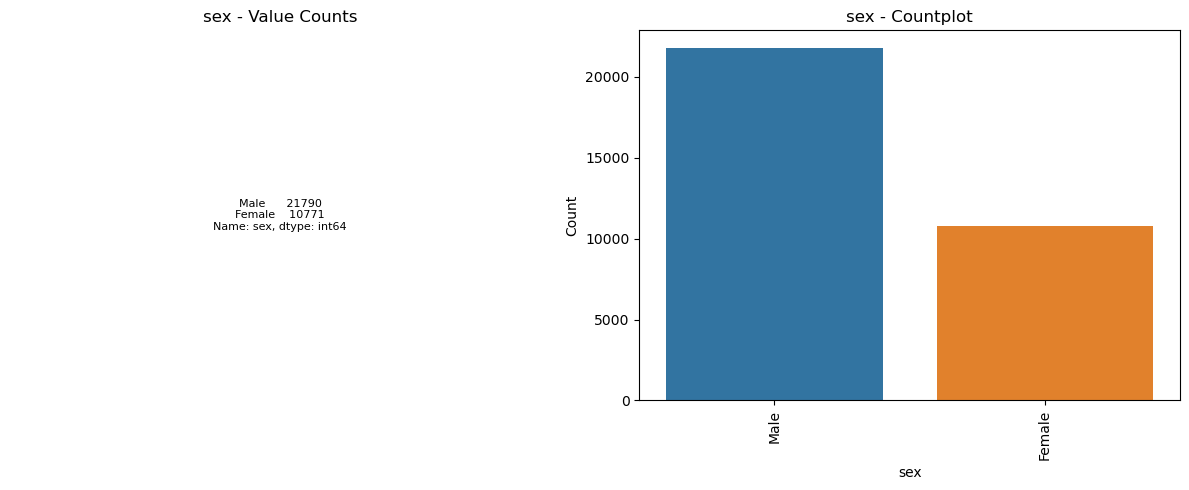

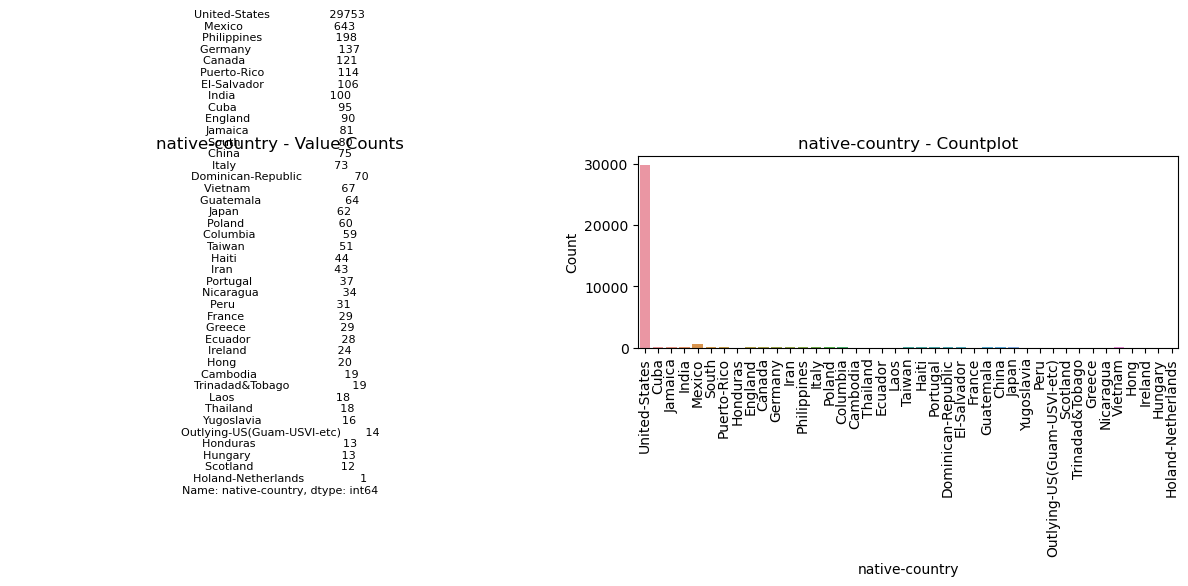

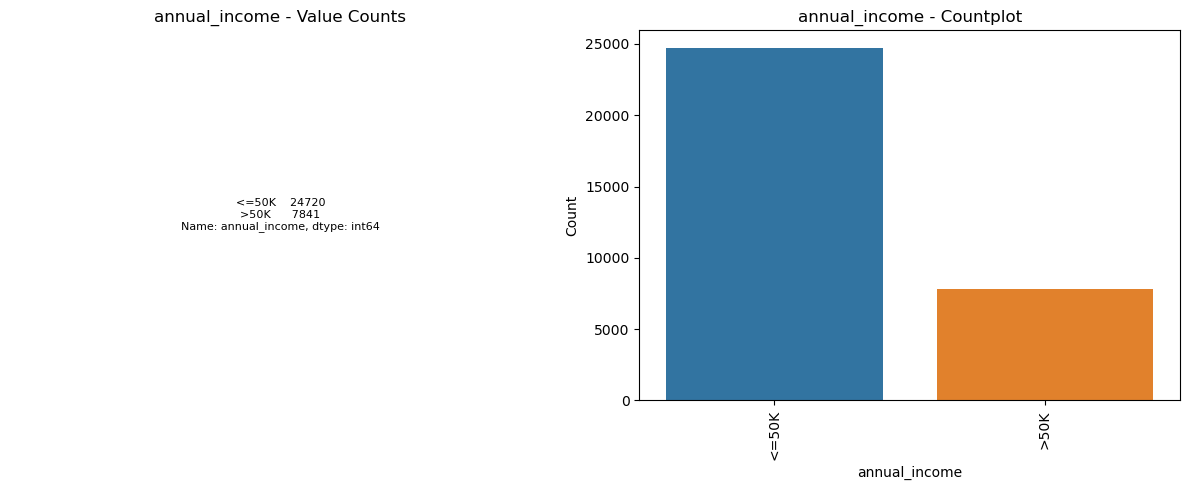

In [23]:
# Loop through columns of type 'object'
for col in data.select_dtypes(include='object').columns:
    
    # Create subplots to show value counts and countplot side by side
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Display value counts as text annotations on the left side
    axes[0].text(0.5, 0.5, str(data[col].value_counts()), ha='center', va='center', fontsize=8) 
    axes[0].set_title(f'{col} - Value Counts')
    axes[0].axis('off')  # Turn off axis for cleaner display
    
    # Plot countplot on the right side
    sns.countplot(x=col, data=data, ax=axes[1])
    axes[1].set_title(f'{col} - Countplot')
    axes[1].set_xlabel(col)
    axes[1].set_ylabel('Count')
    axes[1].tick_params(axis='x', rotation=90)
    
    # Adjust layout to prevent overlapping
    plt.tight_layout()
    
    # Show the plots for each column
    plt.show()


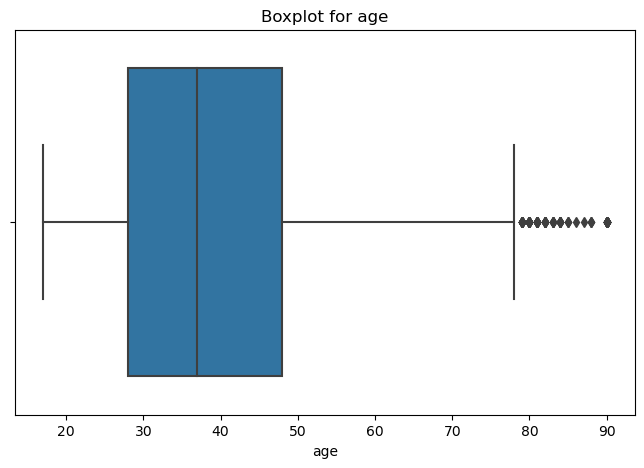

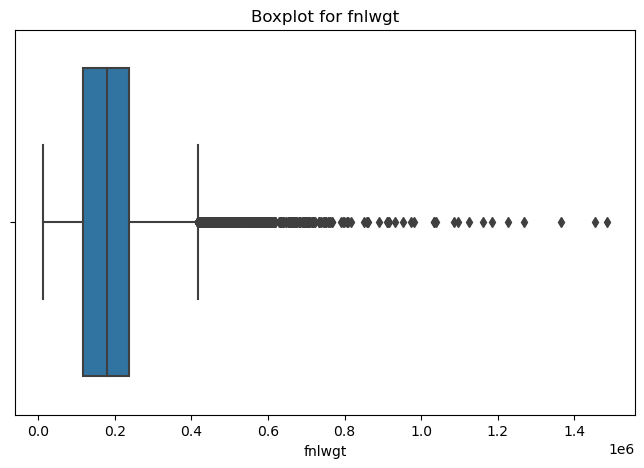

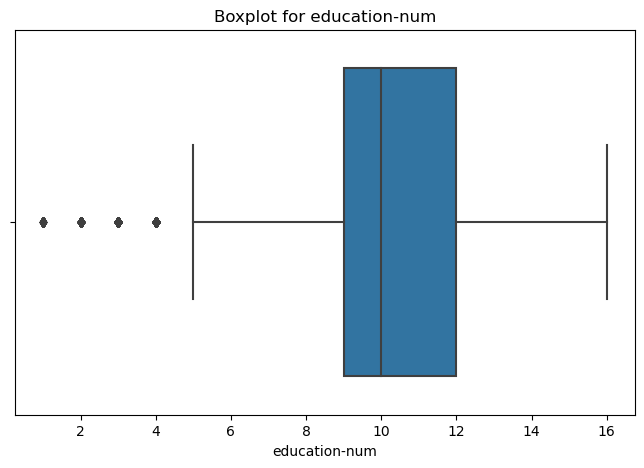

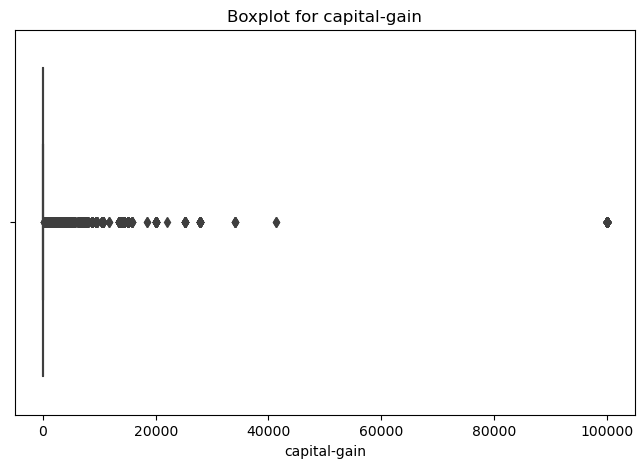

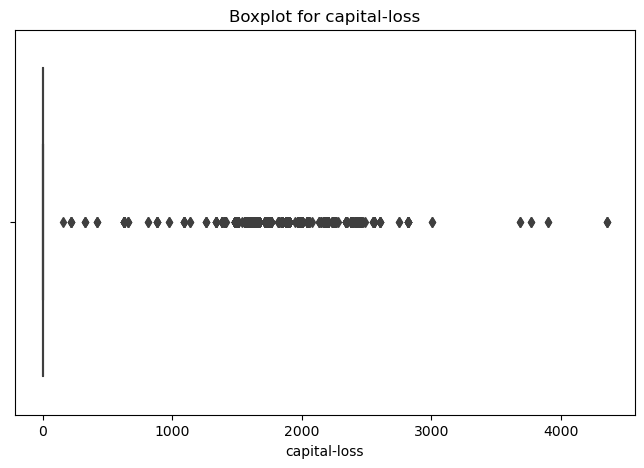

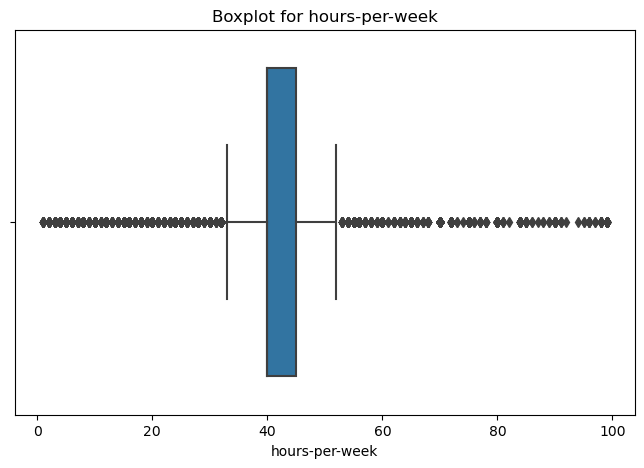

In [24]:
num_data=data.select_dtypes(include=['float64','int64'])
# Create boxplots for selected columns
for col in num_data:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.show()

In [25]:
from scipy.stats import zscore

# Assuming 'data' is your DataFrame and 'columns_to_check' contains numerical columns
columns_to_check = ['fnlwgt','education-num', 'hours-per-week']  # Replace with your column names

for col in columns_to_check:
    z_scores = zscore(data[col])
    threshold = 3  # Set the threshold for z-score
    outliers = np.abs(z_scores) > threshold
    outlier_values = data[col][outliers]
    
    # Replace outliers with mean or median (or any other method)
    # For example, replacing outliers with mean:
    data.loc[outliers, col] = data[col].mean()  # Replace with mean of the column

# Function to replace outliers with upper/lower bounds
def replace_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Replace outliers with upper or lower bound
    df[col] = df[col].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
    return df

# Checking for outliers and replacing them in selected columns
for col in num_data:
    data = replace_outliers(data, col)

In [26]:
#Check for nulls
data.isnull().sum().sum()

0

In [27]:
#Correlation Analysis
corr_matrix=data.corr(numeric_only=True)
corr_matrix

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.074435,0.048974,0.077674,0.057775,0.080899
fnlwgt,-0.074435,1.000000,-0.033435,0.001907,-0.006713,-0.013139
education-num,0.048974,-0.033435,1.000000,0.124916,0.080993,0.159723
capital-gain,0.077674,0.001907,0.124916,1.000000,-0.031615,0.082872
capital-loss,0.057775,-0.006713,0.080993,-0.031615,1.000000,0.057373
hours-per-week,0.080899,-0.013139,0.159723,0.082872,0.057373,1.000000


<AxesSubplot:>

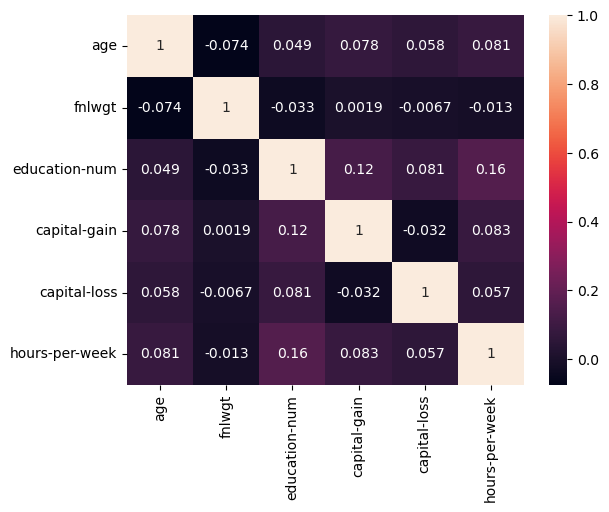

In [28]:
#Plotting a heatmap
sns.heatmap(corr_matrix,annot=True)

In [29]:

# Find highly correlated columns (threshold > 0.5 or <-0.5)
threshold = 0.5
high_correlation = corr_matrix[((corr_matrix >= threshold) | (corr_matrix <= -threshold)) & (corr_matrix != 1)]
highly_correlated_cols = high_correlation.unstack().dropna().to_dict()
num=len(highly_correlated_cols)

if(num>0):
    print("Highly Correlated Columns:")
    for (col1, col2), correlation in highly_correlated_cols.items():
        print(f"{col1} - {col2}: {correlation}")
else:
    print("Not much highly correlated columns")
    

Not much highly correlated columns


In [30]:
#Checking for multicollinearity
num_data=data.select_dtypes(include=['float64','int64'])
vif_data=pd.DataFrame()
vif_data['feature']=num_data.columns
vif_data['vif']=[variance_inflation_factor(num_data.values,i)for i in range(len(num_data.columns))]
print(vif_data)


          feature        vif
0             age   7.524630
1          fnlwgt   4.221007
2   education-num  12.252840
3    capital-gain   1.033007
4    capital-loss   1.056641
5  hours-per-week  11.403143


In [38]:
data.columns
#Feature engineering
data['Tot_Work_Hours'] = data['education-num'] * data['hours-per-week']
data['Age_Education'] = data['age'] * data['education-num']
# Dropping redundant features
data.drop('education-num', axis=1, inplace=True)
print(data.columns)  # Display columns after dropping 'education-num'

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'annual_income',
       'Tot_Work_Hours', 'Age_Education'],
      dtype='object')

# Data Preprocessing Before Model Training

In [ ]:
#Applying transforms to numerical features
# Identify numerical columns
df_edit=data
print(df_edit.columns)
numeric_cols = df_edit.select_dtypes(include=['float64', 'int64']).columns

# Apply log transformation to selected columns
for col in numeric_cols:
    if (df_edit[col] > 0).all():
        df_edit[col] = np.log(df_edit[col])
    else:
        print(f"Column '{col}' contains non-positive values and cannot be log-transformed.")


In [ ]:
#label encoding
df_edit=data
from sklearn.preprocessing import LabelEncoder

cate_cols=data.select_dtypes(include='object').columns
label_encoder = LabelEncoder()

for col in cate_cols:
    if col in data.columns:# Checking if the column exists in the DataFrame
        df_edit[col + '_encoded'] = label_encoder.fit_transform(data[col])
        df_edit.drop(col,axis=1,inplace=True)

df_edit

In [ ]:
#Dropping columns with no correlation at all

df_edit.drop(columns=['capital-gain','capital-loss'],axis=1,inplace=True)
df_edit

In [ ]:
df_edit.columns

In [ ]:
#creating a df with dependent variable
y=df_edit['annual_income_encoded']
y

In [ ]:
X=df_edit.drop('annual_income_encoded',axis=1)
X

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import *
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy:{accuracy:.4f}")

In [ ]:
confusion_matrix(y_test,y_pred)

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")